# CSE428 Week 3 Coding Assignment

In [ ]:
NAME = "TANIA RAHMAN KHAN"
ID = "19101513"
COLLABORATORS_ID = ["", ""]

This assignment contains 4 tasks. Complete the notebook with proper codes for the lines with `# TO-BE-COMPLETED` tag, or by *uncommenting* a partially written codes where necessary.

Background: We larned in class that linear spatial filtering is basically a signal correlation opration between an image and a filter kernel. To filter an ```image``` with a ```kernel``` all we need to do is call the ```signal.correlate``` function from the ```scipy``` library.

```
filtered_image = signal.correlate(image, kernel, mode='same', method='auto')
```
Here, ```mode="same"``` takes care of the image padding under the hood; making the filtered image the *same shape* as the input image, while ```mode="valid"``` *shrinks the filtered image*. The ```method='direct'``` implements the correlation from the definition of signal correlation:

> $g(x, y)=\sum_{s,t}{w(s, t)}f(x+s, y+t)$

whereas ```method='fft'``` uses a frequency domain implementation which we will learn next week. The ```method='auto'``` chooses the faster implementation automatically. <br>
(Except for **Task 1**, always use ```method='auto'``` while using the correlation function )




We use the following code stucture to measure the excecution time of some python code:

```
import time

start_time = time.clock()

# some python code

print("Time elapsed: ", time.clock() - start_time, "seconds")
```


## **Task 0: The Imports** <br>
### Import the necessary libraries and define the helper functions. You can use the helper functions from the coding tutorials, or you can even use your own version of helper functions. <br>


In [ ]:
# Import libraries

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.io import imread
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.util import pad
from skimage.util import random_noise
from scipy import signal
import matplotlib.pyplot as plt
from skimage import io, color, exposure

In [ ]:
# Define helper functions

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....

def plot_image(image,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(image.shape)==2:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(image)
    plt.axis("off")
    plt.show()
    print("Image shape: ", image.shape)

def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

def gaussian_kernel(width=1, size=10):
    gaussian1dkernel = signal.gaussian(size, width).reshape(size, 1)
    kernel = np.outer(gaussian1dkernel, gaussian1dkernel)
    return kernel/np.sum(kernel)

def box_kernel(size=5):
    return np.ones((size, size))/size**2


## **Task 1: Execution Time** <br>
### Excecution time comparison for the 2 different methods of the correlation function <br>


In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = None # TO-BE-COMPLETED
image = io.imread("/content/spongebob.jpeg")
image.shape

(312, 480, 3)

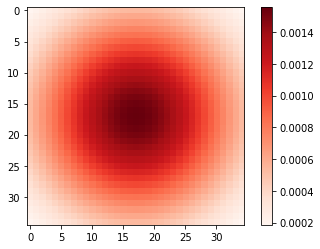

Kernel shape:  (35, 35)


In [ ]:
# Define a gaussian kernel of size (35, 35)

kernel = None # TO-BE-COMPLETED
k = 35
spread = k/3
kernel = gaussian_kernel(spread, size=k)
plot_kernel(kernel)

In [ ]:
# Determine the time to filter the image with the kernel using "direct" method

import time

start_time = time.clock()
pad_width = int((35-1)/2)
filetred_image_direct = None # TO-BE-COMPLETED

img_zero_padded = pad(image, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
img_filtered = np.zeros_like(image)

for i in range(img_zero_padded.shape[-1]):
  img_filtered[:,:,i] = signal.correlate(img_zero_padded[:,:,i], kernel, mode='valid', method='direct') # experiment with method="direct", took 4m40s for me

print("Time elapsed using direct method of correlation: ", time.clock() - start_time, "seconds")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: skimage.util.pad is deprecated and will be removed in version 0.19. Please use numpy.pad instead.
  if __name__ == '__main__':


Time elapsed using direct method of correlation:  9.374176999999975 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


In [ ]:
# Determine the time to filter the image with the kernel using "fft" method

start_time = time.clock()

filetred_image_fft = None  # TO-BE-COMPLETED

img_zero_padded = pad(image, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
filetred_image_fft = np.zeros_like(image)

for i in range(img_zero_padded.shape[-1]):
  filetred_image_fft[:,:,i] = signal.correlate(img_zero_padded[:,:,i], kernel, mode='valid', method='fft') # experiment with method="direct", took 4m40s for me

print("Time elapsed using fft method of correlation: ", time.clock() - start_time, "seconds")

Time elapsed using fft method of correlation:  0.048049000000020214 seconds


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: skimage.util.pad is deprecated and will be removed in version 0.19. Please use numpy.pad instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


### **Answer to Task 1** <br>

### Write your answer here. Comment on the results.

(From here onwards, please use ```method="auto"``` while using any signal function.)

## **Task 2: Correlation Vs. Convolution** <br>
### Comparing the correlation and convolution operation for different kernels<br>


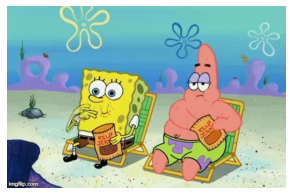

Image shape:  (312, 480, 3)


In [ ]:
# Import an image taken by you, make sure it's dimensions does not exceed (512, 512). Downsample if necessary.

image = None # TO-BE-COMPLETED

image = io.imread("/content/spongebob.jpeg")

plot_image(image)

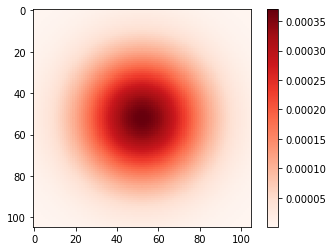

Kernel shape:  (105, 105)


In [ ]:
# Define any symmetric kernel of size (105, 105)

kernel_symmetric = None # TO-BE-COMPLETED
k = 105
spread = k/5
kernel_symmetric = gaussian_kernel(spread, size=k)
plot_kernel(kernel_symmetric)

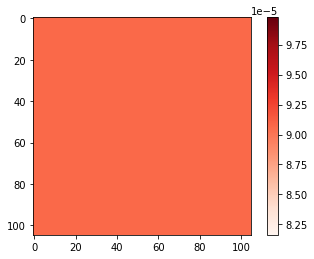

Kernel shape:  (105, 105)


In [ ]:
# Define any asymmetric kernel of size (105, 105)

kernel_asymmetric = None # TO-BE-COMPLETED
k = 105
spread = k/3
kernel_asymmetric = box_kernel(size=k)
plot_kernel(kernel_asymmetric)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: skimage.util.pad is deprecated and will be removed in version 0.19. Please use numpy.pad instead.
  


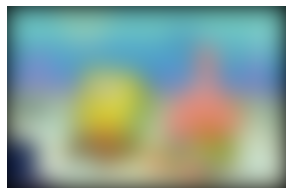

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: skimage.util.pad is deprecated and will be removed in version 0.19. Please use numpy.pad instead.
  del sys.path[0]


Image shape:  (312, 480, 3)


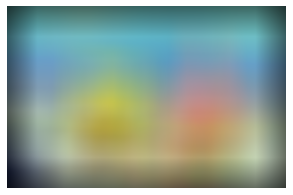

Image shape:  (312, 480, 3)


In [ ]:
# Filter the image with the symmetric kernel using the correlation function

filtered_image_symmetric = None # TO-BE-COMPLETED
filtered_image_asymmetric = None # TO-BE-COMPLETED
pad_width = int((k-1)/2)
img_zero_padded = pad(image, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
filtered_image_symmetric = np.zeros_like(image)

for i in range(img_zero_padded.shape[-1]):
  filtered_image_symmetric[:,:,i] = signal.correlate(img_zero_padded[:,:,i], kernel_symmetric, mode='valid', method='auto')
plot_image(filtered_image_symmetric)

img_zero_padded = pad(image, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
filtered_image_asymmetric = np.zeros_like(image)

for i in range(img_zero_padded.shape[-1]):
  filtered_image_asymmetric[:,:,i] = signal.correlate(img_zero_padded[:,:,i], kernel_asymmetric, mode='valid', method='auto')
plot_image(filtered_image_asymmetric)

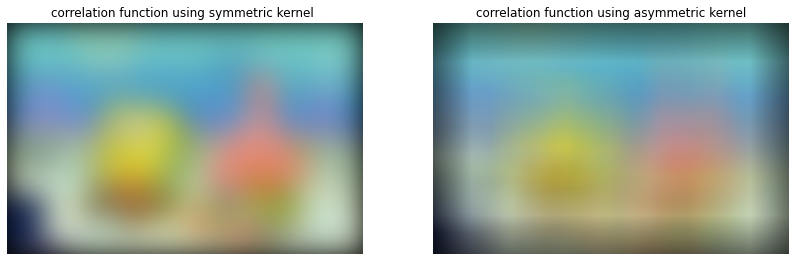

In [ ]:
# Display the images side by side (with proper labeling, which is which)
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(filtered_image_symmetric, cmap="gray")
ax1.title.set_text('correlation function using symmetric kernel ')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(filtered_image_asymmetric, cmap="gray")
ax2.title.set_text('correlation function using asymmetric kernel')
ax2.axis("off")

plt.show()

### **Answer to Task 2.1** <br>
Here, correlation function using symmetric kernel is better than correlation function using asymmetric kernel because it's more clear than the asymmetric one.

### Write your answer here. Compare the outputs.


Now, to *convolve* an ```image``` with a ```kernel``` all we need to do is call the ```signal.convolve``` function from the ```scipy``` library.

```
filtered_image = signal.convolve(image, kernel, mode='same', method='auto')```

The parameters work the same way as the ```signal.correlate```function.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: skimage.util.pad is deprecated and will be removed in version 0.19. Please use numpy.pad instead.
  import sys


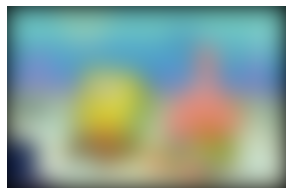

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: skimage.util.pad is deprecated and will be removed in version 0.19. Please use numpy.pad instead.
  from ipykernel import kernelapp as app


Image shape:  (312, 480, 3)


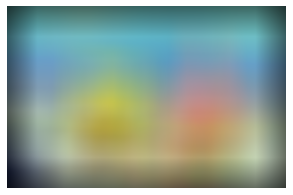

Image shape:  (312, 480, 3)


In [ ]:
# Filter the image with the asymmetric kernel using the convolution function

filtered_image_symmetric = None # TO-BE-COMPLETED
filtered_image_asymmetric = None # TO-BE-COMPLETED
pad_width = int((k-1)/2)

img_zero_padded = pad(image, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
filtered_image_symmetric = np.zeros_like(image)

for i in range(img_zero_padded.shape[-1]):
  filtered_image_symmetric[:,:,i] = signal.convolve(img_zero_padded[:,:,i], kernel_symmetric, mode='valid', method='auto')
ax2.title.set_text('convolution function')
plot_image(filtered_image_symmetric)

img_zero_padded = pad(image, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
filtered_image_asymmetric = np.zeros_like(image)

for i in range(img_zero_padded.shape[-1]):
  filtered_image_asymmetric[:,:,i] = signal.convolve(img_zero_padded[:,:,i], kernel_asymmetric, mode='valid', method='auto')
ax2.title.set_text('convolution function')
plot_image(filtered_image_asymmetric)

### **Answer to Task 2.2** <br>
Here, convolution function  is better than correlation function for this image because convolution function more clear than correlation function.

### Write your answer here. Compare the outputs.

## **Task 3: Edge Pair Detector** <br>
### Try to come up with two 3 x 3 filter kernels which are able to detect ***only the parallel pair of edges*** in the following image<br>

![](https://drive.google.com/uc?export=view&id=1a1CXbuC8A2FbyFvZovJMXERUijpatecU)

[The image can be downloaded from here: https://drive.google.com/file/d/1a1CXbuC8A2FbyFvZovJMXERUijpatecU/view?usp=sharing]

*Hint: No mathematical derivation is necessary. Just try devising the kernels using the same intuitions used behind the horizontal and vertical edge detector kernels. Coming up with a filter kernel means to determine the 9 filter coefficients of the 3x3 filer kernel.*

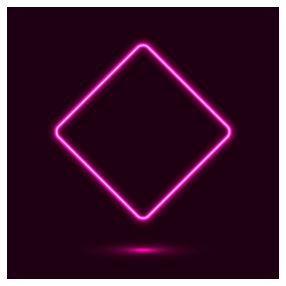

Image shape:  (626, 626, 3)


In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab. Then load the image
from skimage.filters import laplace
image = None # TO-BE-COMPLETED
image = io.imread("diamond2.jpg")
plot_image(image)


In [ ]:
# define the 2 custom kernels by replacing the "?"s with your values and uncomment the next few lines of code in this cell

# kernel_1 = np.array([[?, ?, ?], # TO-BE-COMPLETED
#                      [?, ?, ?], # TO-BE-COMPLETED
#                      [?, ?, ?]]) # TO-BE-COMPLETED


kernel_1 = np.array([[0, 1, 0],
                     [1,-4, 1],
                     [0, 1, 0]])


# kernel_2 = np.array([[?, ?, ?], # TO-BE-COMPLETED
#                      [?, ?, ?], # TO-BE-COMPLETED
#                      [?, ?, ?]]) # TO-BE-COMPLETED

kernel_2 = np.array([[0, 1, 0],
                     [1,-8, 1],
                     [0, 1, 0]])


In [ ]:
# detect the 2 parallel pair of edges and plot them side by side in a 1x2 grid subplot

# detect the first pair using image filtering with kernel_1

using skimage laplace filter

first_pair_detected = None # TO-BE-COMPLETED
first_pair_detected = signal.correlate(image, kernel_1, mode='valid', method='auto')

# detect the second pair using image filtering with kernel_2

second_pair_detected = None # TO-BE-COMPLETED
second_pair_detected = signal.correlate(image, kernel_2, mode='valid', method='auto')
# plot the two filtered images side by side
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(first_pair_detected, cmap="gray")
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(second_pair_detected, cmap="gray")
ax2.axis("off")

plt.show()
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED
# TO-BE-COMPLETED

SyntaxError: ignored

### **Answer to Task 3** <br>

### Write your answer here. Which filters you came up with and why? How did you choose the coefficients? Are your kernels unique or there can be other kernels which can accomplish the same task?


## **Task 4: Image Denoising** <br>
### Take something.jpg image and corrupt it with *gaussian noise* of 0 mean and 0.2 variance. Denoise the image using:

1.   Total Variation Denoising (TVD)
2.   Bilateral Filtering (BF)

Feel free to experiment with the different filter parameters and try to come up with a cleaner image. Fianlly, comapre the MSE between the denoised images and the original uncorrupted image.

something.jpg can be downloaded from here: https://drive.google.com/file/d/1KgoZJDsTIW_NMh8LJ5oUneAQkIQsfzKT/view?usp=sharing


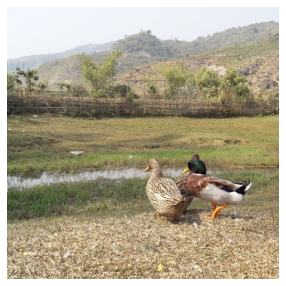

Image shape:  (1012, 1012, 3)


In [ ]:
# Download the image from the drive link above and upload it to your current working directory in colab
# Then load the image "something.jpg"

image = None # TO-BE-COMPLETED
image = io.imread("/content/something.jpg")
plot_image(image)


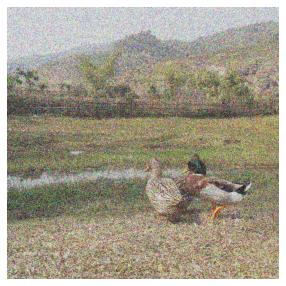

Image shape:  (1012, 1012, 3)


In [ ]:
# corrupt the original image

image_noisy = None # TO-BE-COMPLETED

image_noisy = random_noise(image, mode="gaussian", var=0.2)
plot_image(image_noisy, figsize=(5, 5))

In [ ]:
# import the bilateral filter
from skimage.restoration import denoise_bilateral
# from skimage.restoration import None # TO-BE-COMPLETED
from skimage.restoration import denoise_tv_chambolle
# import the total variation denoising filter

# from skimage.restoration import None # TO-BE-COMPLETED

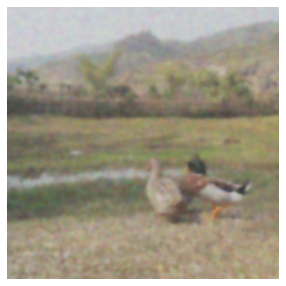

Image shape:  (1012, 1012, 3)


In [ ]:
# clean the image using TVD

image_denoised_tvd = None # TO-BE-COMPLETED
image_denoised_tvd = denoise_tv_chambolle(image_noisy,
                                       weight=1, eps=0.00001, n_iter_max=1000, multichannel=True)
plot_image(image_denoised_tvd)

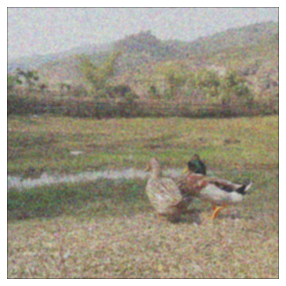

Image shape:  (1012, 1012, 3)


In [ ]:
# clean the image using BF

image_denoised_bf = None # TO-BE-COMPLETED

image_denoised_bf = denoise_bilateral(image_noisy, win_size=10,
                                           sigma_color=50, sigma_spatial=100, multichannel=True)
plot_image(image_denoised_bf)

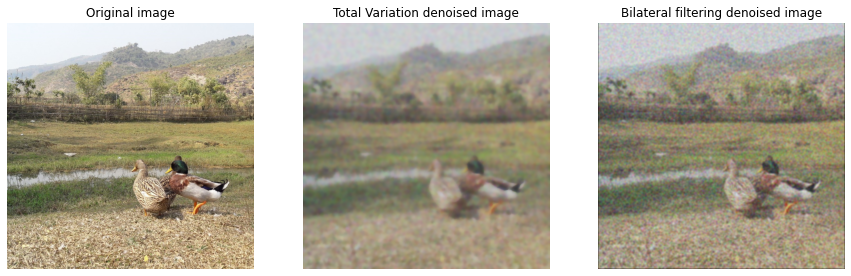

In [ ]:
# plot image, image_denoised_tvd & image_denoised_bf side by side in a 1x3 grid subplot

 # TO-BE-COMPLETED
 # TO-BE-COMPLETED
 # TO-BE-COMPLETED ....
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(image, cmap="gray")
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(image_denoised_tvd, cmap="gray")
ax2.title.set_text('Total Variation denoised image')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image_denoised_bf, cmap="gray")
ax3.title.set_text('Bilateral filtering denoised image')
ax3.axis("off")

plt.show()

In [ ]:
# compute the MSE

mse_tvd = None # TO-BE-COMPLETED
mse_bf = None # TO-BE-COMPLETED

mse_tvd = np.square(np.subtract(image,image_denoised_tvd)).mean()
print("mse_tvd is:", mse_tvd)

mse_bf = np.square(np.subtract(image,image_denoised_bf)).mean()
print("mse_bf is:", mse_bf)

mse_tvd is: 25174.22050293833
mse_bf is: 25174.549873927186


### **Answer to Task 4** <br>

### Write your answer here. Briefly explain your findings both qualitatively (which one looks better) and quantitatively (which one has a better MSE). Which parameters did you tweak? How did that impact the end result?

ANSWER: MSE for Total Variation denoised image is less than the MSE of Bilateral filtering denoised image. That mean's Total Variation denoised image has less errors. So quantitatively (which one has a better MSE) Total Variation denoised image is better & qualitatively (which one looks better) Bilateral filtering denoised image is better.

## **The END**